https://zhuanlan.zhihu.com/p/483401892
- 余弦相似度 所有像素集合作为向量归一化后做点积
- 哈希算法  
  处理思路：特征处理 缩放数据 对比均值
  - 均值哈希aHash 灰度 缩小为8\*8 对比均值取0or1 只有低频的亮度信息 亮度曲线调整会改变相似度数值 速度快
  - 感知哈希pHash 图片缩放到32\*32 DCT32\*32余弦变换 取8\*8低频信息 计算DTC均值 对比均值 能识别25%内的变形 精确速度慢
  - 差值哈希dHash 缩小到8\*9 转为灰度 相邻像素L-R>0记为1 较精确速度较快
- 直方图 只是图片灰度的概率分布特征
- SSIM（结构相似度度量) 亮度对比\*对比度对比\*结构对比 结构对比是按像素点计算的 
  - 结构对比度表示当个像素点在这个数据集里的离散度
  - 结构对比函数表是 两者的算数积的平均除以各自几何平均的积 // 几何平均是算数积的平均的开方
- 互信息（Mutual Information）
- pixelmatch
- 深度学习方法 思路:深度特征提取+特征向量相似度计算

// 四点差值模和/4 小于1/4周长的1/5
// 向量和 

为什么向量的大小叫做向量的模/范数(module)？ - sumeragi693的回答 - 知乎
https://www.zhihu.com/question/511476850/answer/2310294663

定义距离函数为接收两个参数的二元函数
1. 满足 d(A,B)>=0 不等式的取等条件为 A=B
2. 满足 d(A,B)=d(B,A) 即对称性
3. 满足 d(A,B)<= d(A,C)+d(B,C)
定义范数为一元函数 记元素a的范数为||a||
1. ||a||>=0 的取得条件为a是零向量
2. 对实数k 满足 ||ka||=|k| ||a||
3. ||a+b||<=||a||+||b||

[我这样说范数和模你应该懂L1、L2正则咋回事了吧](https://blog.csdn.net/raychiu757374816/article/details/120842233)


1. L0范数 ![L0_norm](./doc/img/L0_norm.png) 度量向量中非零元素的个数
2. L1范数 ![L1_norm](./doc/img/L1_norm.png) 曼哈顿距离
3. L2范数 ![L2_norm](./doc/img/L2_norm.png) 欧式距离
4. Lp范数 ![Lp_norm](./doc/img/Lp_norm.png) 闵可夫斯基距离
5. L∞范数 ![L∞_norm](./doc/img/L8_norm.gif) 切比雪夫距离

- L2范数通过对参数向量各元素平方和求平方根，使得L2范数最小，从而使得参数的各个元素接近0 ，但不等于0。
- 而L1范数正则化比L2范数更易获得“稀疏”解，即L1范数正则化求得的会有更少的非零分量，
- 所以L1范数可用于特征选择，而L2范数在参数规则化时经常用到（事实上，L0范数得到的“稀疏”解最多，但L0范数是中非零元素的个数，不连续，难以优化求解。因此常用L1范数来近似代替）。

D:\1024\python\opencv-practice\OpenCVSudoku
True
True
True
diff 1-2 0.034375
diff 1-3 0.057692307692307696


<IPython.core.display.Javascript object>


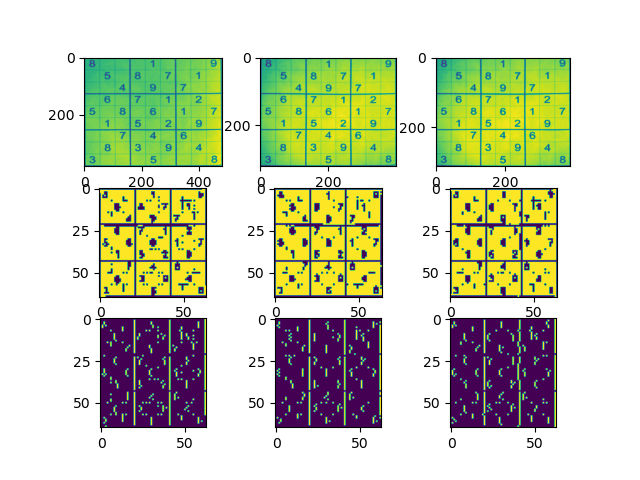

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from imageLike.imageHash import image_d_hash,hash_diff
from pyimagesearch.sudoku import find_puzzle
import imutils

%matplotlib notebook

!echo %cd%

imgPath1 = "./sudoku_puzzle.jpg"
imgPath2 = "./sudoku_puzzle1.jpg"
imgPath3 = "./sudoku_puzzle2.jpg"
shape = (64,65)
img1 = cv2.imread(imgPath1)
img2 = cv2.imread(imgPath2)
img3 = cv2.imread(imgPath3)
img1 = imutils.resize(img1,width = 600)
img2 = imutils.resize(img2,width = 600)
img3 = imutils.resize(img3,width = 600)
oimg1 = img1 = find_puzzle(img1)["warped"]
oimg2 = img2 = find_puzzle(img2)["warped"]
oimg3 = img3 = find_puzzle(img3)["warped"]
img1 = cv2.resize(img1,shape,interpolation=cv2.INTER_AREA)
img2 = cv2.resize(img2,shape,interpolation=cv2.INTER_AREA)
img3 = cv2.resize(img3,shape,interpolation=cv2.INTER_AREA)
# oimg1 = img1 = cv2.GaussianBlur(img1,(3,3),3)
# oimg2 = img2 = cv2.GaussianBlur(img2,(3,3),3)
# oimg3 = img3 = cv2.GaussianBlur(img3,(3,3),3)

img1 = cv2.adaptiveThreshold(img1,255, # 自动阈值
        cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,2)
img2 = cv2.adaptiveThreshold(img2,255, # 自动阈值
        cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,2)
img3 = cv2.adaptiveThreshold(img3,255, # 自动阈值
        cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,2)
hash1 = image_d_hash(img1,shape=shape)
hash2 = image_d_hash(img2,shape=shape)
hash3 = image_d_hash(img3,shape=shape)
print(f"diff 1-2 {(hash_diff(hash1,hash2)/(shape[0]*shape[1]))}")
print(f"diff 1-3 {(hash_diff(hash1,hash3)/(shape[0]*shape[1]))}")

plt.subplot(331)
plt.imshow(oimg1)
plt.subplot(332)
plt.imshow(oimg2)
plt.subplot(333)
plt.imshow(oimg3)
plt.subplot(334)
plt.imshow(img1)
plt.subplot(335)
plt.imshow(img2)
plt.subplot(336)
plt.imshow(img3)
plt.subplot(337)
plt.imshow(hash1)
plt.subplot(338)
plt.imshow(hash2)
plt.subplot(339)
plt.imshow(hash3)
plt.show()


- [DCT变换](https://zhuanlan.zhihu.com/p/413252930)
- []()

D:\1024\python\opencv-practice\OpenCVSudoku
pHash diff 1-2 0.00390625
pHash diff 1-3 0.0048828125


<IPython.core.display.Javascript object>


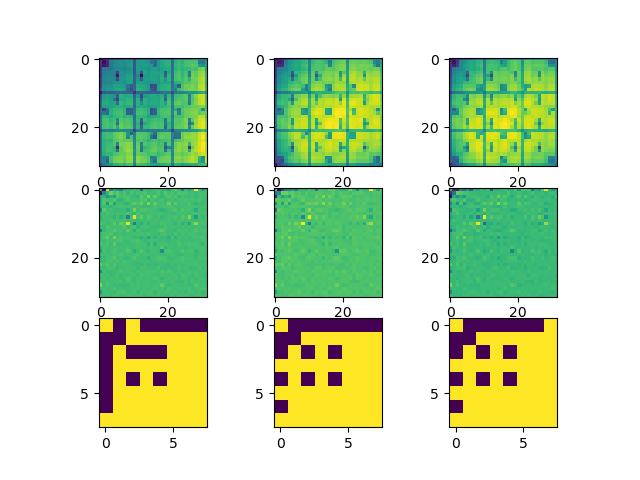

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imageLike.imageHash import image_d_hash,image_p_hash,hash_diff
from pyimagesearch.sudoku import find_puzzle
import imutils

%matplotlib notebook

!echo %cd%

imgPath1 = "./sudoku_puzzle.jpg"
imgPath2 = "./sudoku_puzzle1.jpg"
imgPath3 = "./sudoku_puzzle2.jpg"
img1 = cv2.imread(imgPath1)
img2 = cv2.imread(imgPath2)
img3 = cv2.imread(imgPath3)
img1 = imutils.resize(img1,width = 600)
img2 = imutils.resize(img2,width = 600)
img3 = imutils.resize(img3,width = 600)
img1 = find_puzzle(img1)["warped"]
img2 = find_puzzle(img2)["warped"]
img3 = find_puzzle(img3)["warped"]
pshape = [32,32]
img1 = cv2.resize(img1,pshape,interpolation=cv2.INTER_AREA)
img2 = cv2.resize(img2,pshape,interpolation=cv2.INTER_AREA)
img3 = cv2.resize(img3,pshape,interpolation=cv2.INTER_AREA)

dct1 = cv2.dct(np.float32(img1))
dct2 = cv2.dct(np.float32(img2))
dct3 = cv2.dct(np.float32(img3))

hash1 =  image_p_hash(img1,pshape,ignoreDC=True)
hash2 =  image_p_hash(img2,pshape,ignoreDC=True)
hash3 =  image_p_hash(img3,pshape,ignoreDC=True)

print(f"pHash diff 1-2 {(hash_diff(hash1,hash2)/(pshape[0]*pshape[1]))}")
print(f"pHash diff 1-3 {(hash_diff(hash1,hash3)/(pshape[0]*pshape[1]))}")

def show_matrix_text(matrix):
    for y,row in enumerate(matrix):
        for x,cell in enumerate(row):
            plt.text(x,y,f"{cell:.2f}",ha="center",va="center",color="white")

dct1[0,0] = 0
dct2[0,0] = 0
dct3[0,0] = 0
# plt.subplot(111)
# plt.imshow(dct1[:], )
# plt.show()
# plt.subplot(111)
# plt.imshow(dct2[:], )
# plt.show()
# plt.subplot(111)
# plt.imshow(dct3[:], )
# plt.show()

plt.subplot(331)
plt.imshow(img1)
plt.subplot(332)
plt.imshow(img2)
plt.subplot(333)
plt.imshow(img3)

plt.subplot(334)
plt.imshow(dct1)
plt.subplot(335)
plt.imshow(dct2)
plt.subplot(336)
plt.imshow(dct3)
plt.subplot(337)
plt.imshow(hash1)
plt.subplot(338)
plt.imshow(hash2)
plt.subplot(339)
plt.imshow(hash3)
plt.show()